# **House Price Prediction**

### **Problem Statement**
The price of a house depends on multiple factors such as location, size, number of rooms, crime rate, and accessibility to services. Predicting house prices accurately is a challenging task but is highly valuable for real estate businesses, buyers, and sellers.

The problem is to **develop a machine learning model that can predict the price of a house based on its features**, using the Boston Housing dataset. The goal is to understand the relationship between different housing features and house prices, and to create a predictive model that minimizes the error between predicted and actual prices.

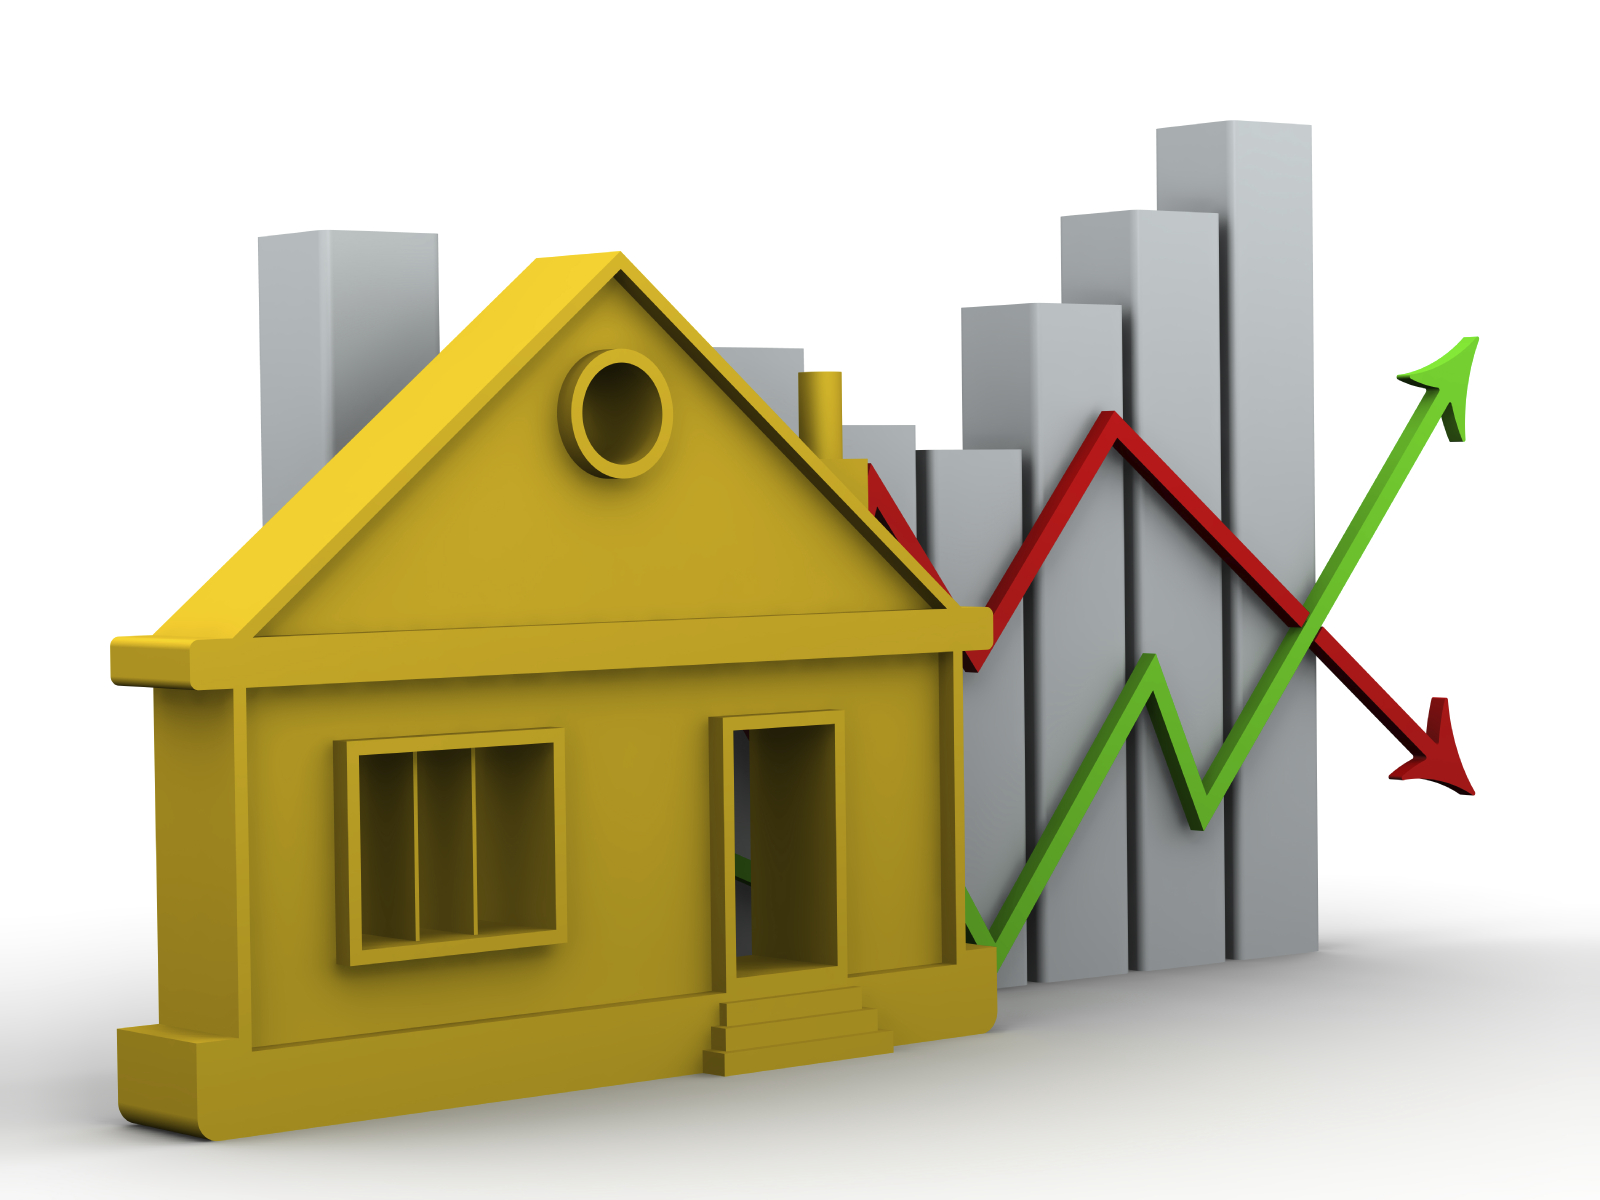

### **Data Collection**
- Data Source : [Boston Housing Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)
- The data consists of 545 rows and 13 columns

### **Data Information**

The dataset contains various features that influence house prices. Below is a brief description of each feature:

- price (Target Variable): The price of the house.
- area: Total area of the house in square feet.
- bedrooms: Number of bedrooms in the house.
- bathrooms: Number of bathrooms in the house.
- stories: Number of floors in the house.
- mainroad: Whether the house is located on the main road (Yes/No - categorical).
- guestroom: Whether the house has a guest room (Yes/No - categorical).
- basement: Whether the house has a basement (Yes/No - categorical).
- hotwaterheating: Whether the house has a hot water heating system (Yes/No - categorical).
- airconditioning: Whether the house has air conditioning (Yes/No - categorical).
- parking: Number of parking spaces available (numerical).
- prefarea: Whether the house is in a preferred locality (Yes/No - categorical).
- furnishingstatus: The furnishing status of the house (Fully Furnished/Semi-Furnished/Unfurnished - categorical).

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### 1. Data Understanding:

#### A. Read the CSV file

In [2]:
# import the csv file
housing = pd.read_csv("Housing.csv")

# Read the first five rows of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### B. Print shape and Column of the dataset

In [3]:
# shape of the dataset
shape = housing.shape
print(f"Shape of the dataset:",shape)

Shape of the dataset: (545, 13)


In [4]:
# define numerical & categorical columns
numeric_features = [feature for feature in housing.columns if housing[feature].dtype != 'O']
categorical_features = [feature for feature in housing.columns if housing[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

We have 7 categorical features : ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


#### Observation:
- There are 545 rows and 13 columns present in the dataset

#### C. Information about the dataset

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### Observation:
- There are **6 integer** datatypes, and **7 categorical datatypes** present in the dataset.
- price, area, bedrooms, bathrooms, stories, and parking are integer datatypes.
- mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus are categorical datatypes.
- price is the Target variable. 
- There are no missing values present in the dataset.

#### D. Check for missing values

In [6]:
missing_values = housing.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


#### Observation:
- As mentioned above, there are no missing values present in the dataset. 

#### E. Check for duplicate values

In [7]:
duplicates = housing.duplicated().sum()

if duplicates==0:
    print("There are no duplicate values present in the dataset")
else:
    print("There are duplicate values present in the dataset")

There are no duplicate values present in the dataset


#### F. Check the number of unique rows in each column

In [8]:
numerical_col = housing.select_dtypes(include=["int"]).columns
categorical_col = housing.select_dtypes(include=["object"]).columns

# Loop through numerical columns
for col in numerical_col:
    print(f"{col}: {housing[col].unique()}\n")

# loop through categorical columns
for col in categorical_col:
    print(f"{col}: {housing[col].unique()}\n")



price: [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  490000

In [9]:
housing.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

- It seems like there might be a higher corrillation between price and area.
- As the price of the property depends on the area. 
- Features like mainroad, guestroom, basement, hotwaterheating, airconditioning, and prefarea are binary categorical variables (Yes/No).
- This can be converted into 0s and 1s using lable encoder
- furnishingstatus have 3 unique values.
- There are upto 6 bedrooms, 4 bathrooms, and 4 floors.

#### G. Statistical summary

In [10]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### Observation:

**1. Price Distribution**  
- **Average house price:** ₹4.76M  
- **Range:** ₹1.75M – ₹13.3M → wide variation (affordable to luxury segment).  
- Prices are **right-skewed** (since max >> mean).  

**2. Area (Size in sq. ft.)**  
- **Average area:** 5150 sq. ft.  
- **Range:** 1650 – 16,200 sq. ft.  
- **Median (4600) < Mean (5150)** → a few very large houses pull the average up.  

**3. Bedrooms** 
- **Mean:** ~3 bedrooms  
- **Range:** 1–6 bedrooms  
- **75% of houses have ≤3 bedrooms** → bigger houses (4–6) are rare.  

**4. Bathrooms**  
- **Mean:** ~1.3 bathrooms  
- **Median:** 1 → most houses have just **1 bathroom**  
- **Max:** 4 → higher-end houses with more bathrooms are less common.  

**5. Stories**  
- **Mean:** ~1.8 stories  
- Most houses have **1–2 floors**  
- Some go up to **4 stories**.  

**6. Parking**  
- **Mean:** ~0.7 → less than 1 per house on average  
- **Median:** 0 → 50% of houses **have no parking space**  
- **Max:** 3 → very few houses offer multiple parking spaces.  

---

**Key Takeaways**
- **Price is strongly influenced by area** (both show high variation).  
- **Typical house:** 3BHK, 1–2 bathrooms, 1–2 stories.  
- **Parking is scarce** (half the houses lack it) → may strongly affect prices.  
- Outliers exist in both **price** and **area**, which should be handled during modeling.  

### 2. Data Exploration and Analysis:

#### 2.1 Univarient Analysis

#### A. Visualize distribution of all the numerical variables using a histogram and clearly share insights

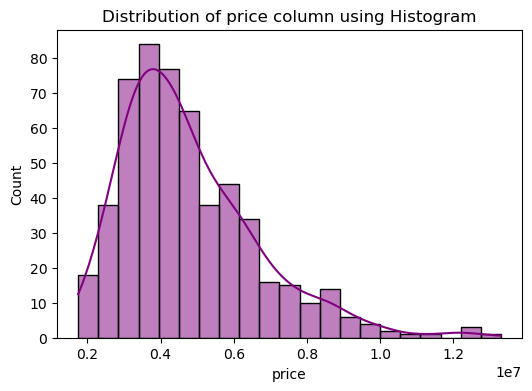

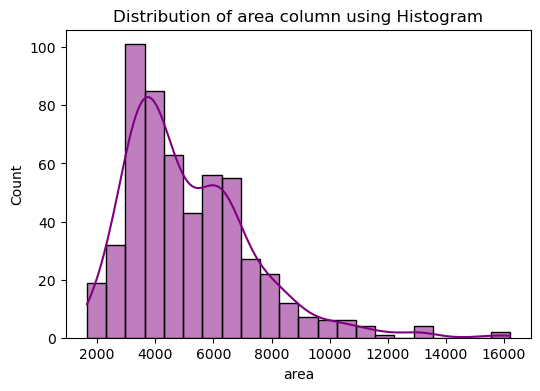

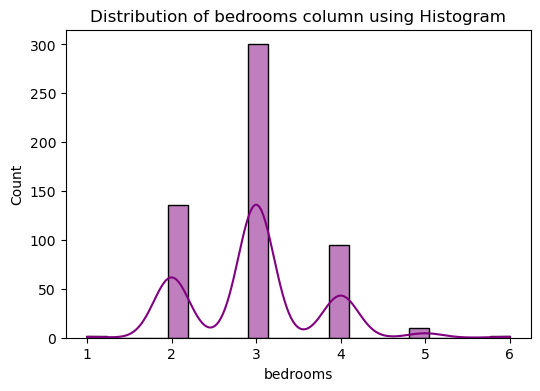

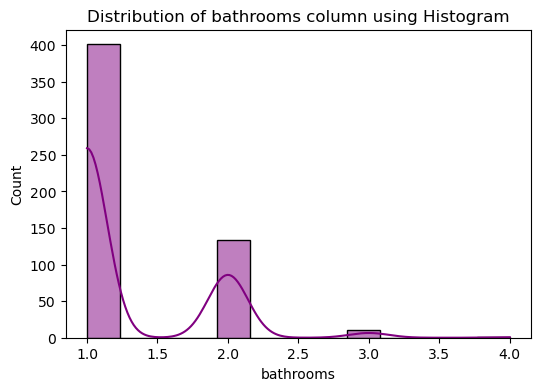

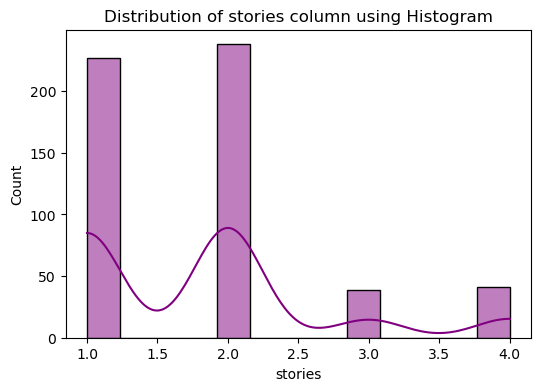

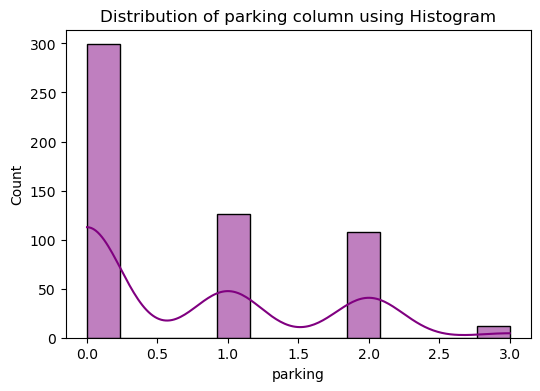

In [11]:
numerical_col = housing.select_dtypes(include=["int"]).columns

# Loop through numerical columns
for col in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=housing, x=col, kde= True, color="purple")
    plt.title(f"Distribution of {col} column using Histogram")
    plt.show()

#### B. Visualize distribution of all the numerical variables using a Boxplot and clearly share insights

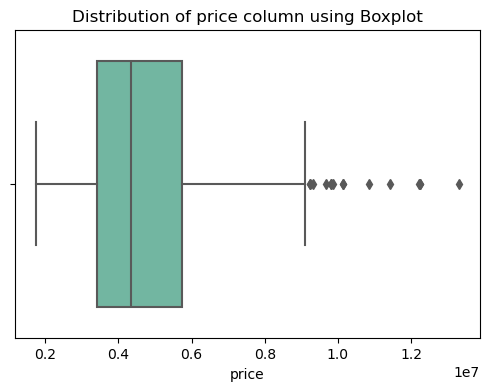

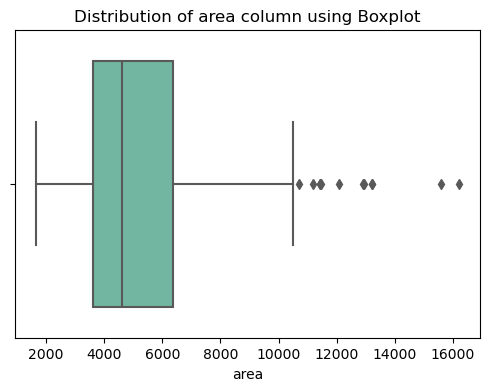

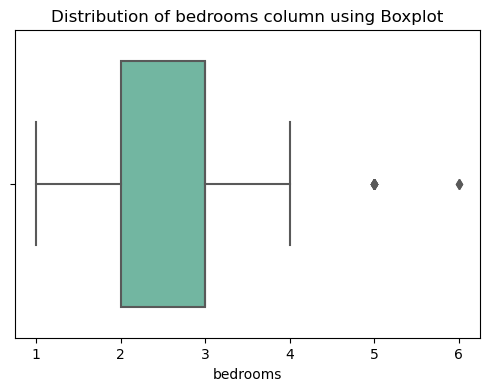

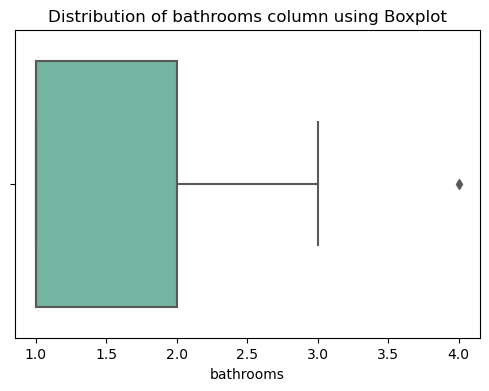

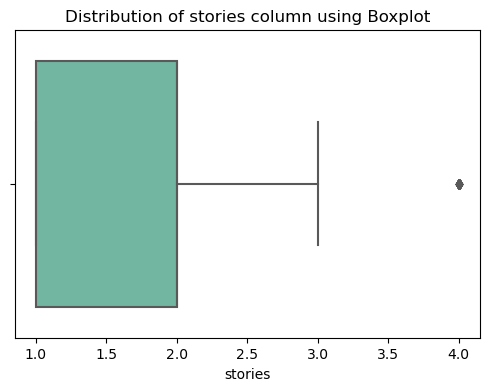

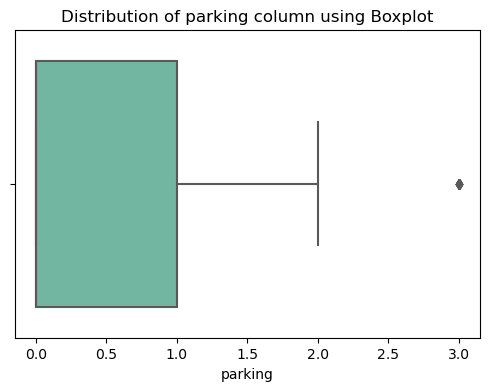

In [12]:
numerical_col = housing.select_dtypes(include=["int"]).columns

# Loop through numerical columns
for col in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=housing, x=col, palette="Set2")
    plt.title(f"Distribution of {col} column using Boxplot")
    plt.show()

#### Over all observation for Boxplot and Histogram:

- **area** and **price**  are right skewe
- Let's not remove the outliers as the price of the house depends on the area (sqft) and the location where the house is situated.

#### C. Visualize distribution of all the categorical variables using countplot and clearly share insights

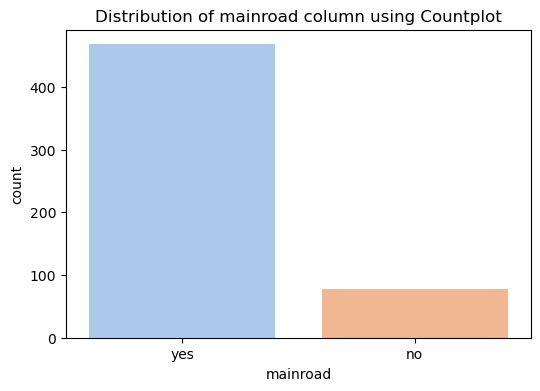

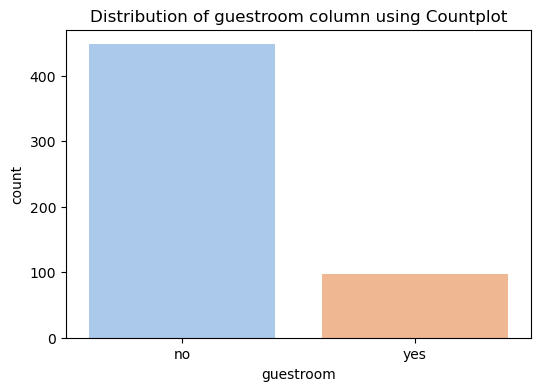

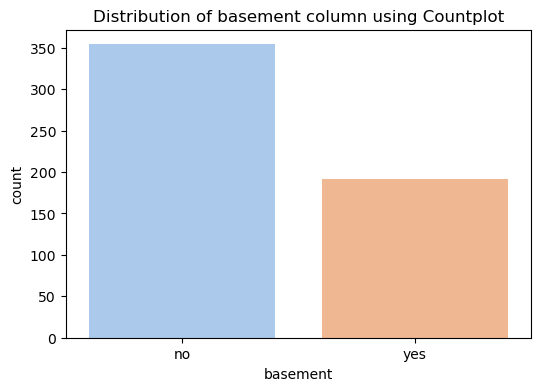

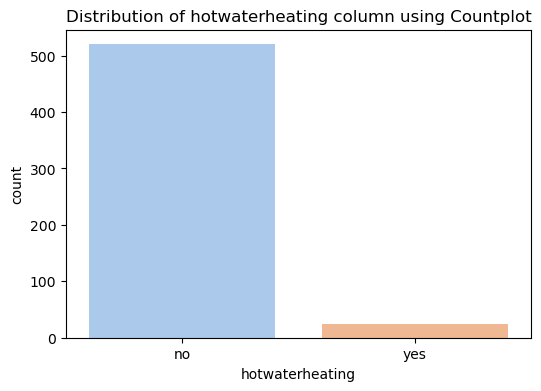

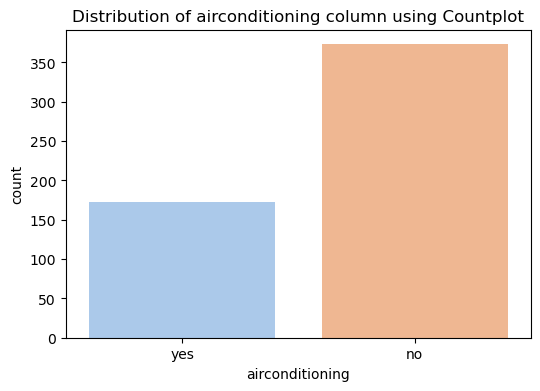

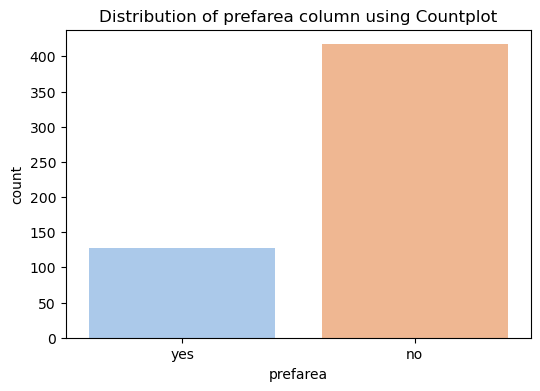

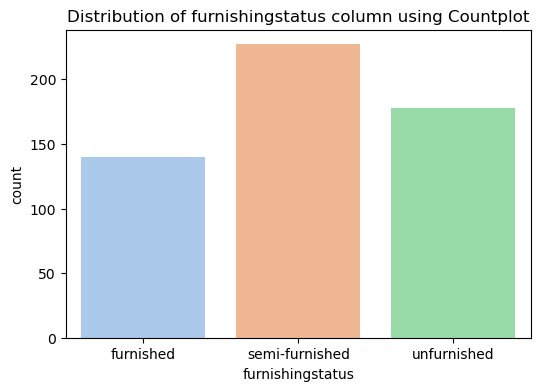

In [13]:
categorical_col = housing.select_dtypes(include=["object"]).columns

# Loop through categorical columns
for col in categorical_col:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=housing, x=col, palette="pastel")
    plt.title(f"Distribution of {col} column using Countplot")
    plt.show()

#### Observation:
- Most houses are located on a **main road**, which may increase accessibility and value.
- Only ~18% of houses have a **guest room** → could be a premium feature.  
- Around **35% of houses have a basement**, which could add usable space and affect pricing.
- **Hot Water Heating** a very rare feature (~5%) → strong differentiator for house value if present.
- About **31% of houses have air conditioning**, may contribute to higher prices.
- ~23% of houses are in a **preferred location** → location may be a strong factor in price.
- Majority are **semi-furnished**, while fully furnished homes are fewer, likely priced higher.   

#### 2.1 **Bivariate Analysis (Two Variables)**

#### A. Visualize the distribution of price and area, clearly share insights.

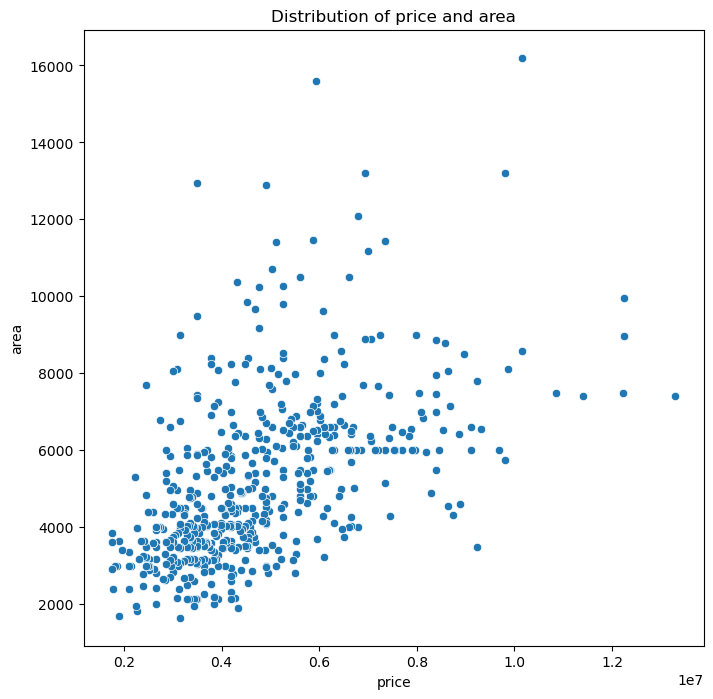

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=housing["price"], y=housing["area"])
plt.title("Distribution of price and area")
plt.show()

#### Observation:
- There is a higher corrilation between price and area.
- Majority of the data points lies in between 2000 and 8000.
- There are some properties with outliers but it can come under luxury property.

### 2.3 **Multivariate Analysis (More than Two Variables)**

#### A. Visualize a corrilation matrix and clearly share insights.

In [15]:
# Select numerical columns
numerical_col = housing.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = numerical_col.corr()
print(corr_matrix)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


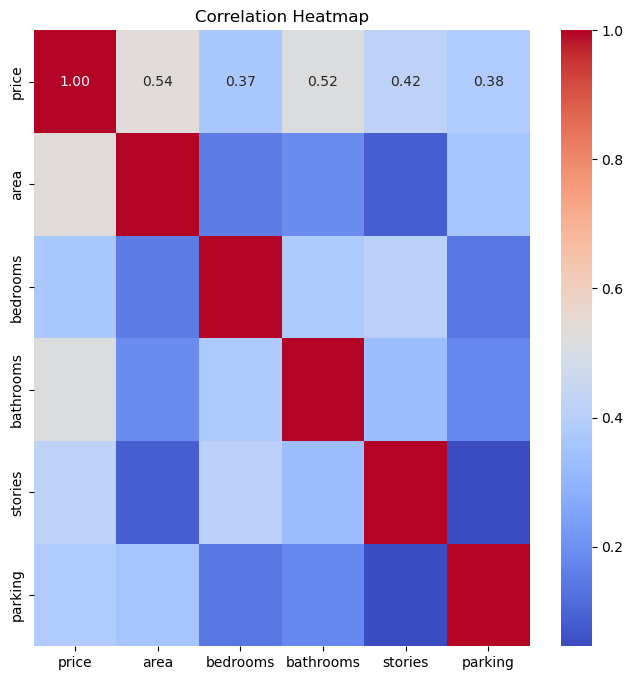

In [16]:
# Plot correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(numerical_col.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Observation (Numerical Features vs Price):

**1. Strongest correlations with **Price**:**
- **Area (0.54)** → Larger houses tend to cost more.  
- **Bathrooms (0.52)** → More bathrooms strongly associated with higher prices.  
- **Stories (0.42)** → Multi-story houses are generally more expensive.  
- **Parking (0.38)** → Availability of parking increases house value.  
- **Bedrooms (0.37)** → More bedrooms moderately increase price.  

**2. Relationships between numerical features:**
- **Bedrooms ↔ Bathrooms (0.37)** → Houses with more bedrooms usually have more bathrooms.  
- **Bedrooms ↔ Stories (0.41)** → Larger houses with more bedrooms often have multiple stories.  
- **Area ↔ Parking (0.35)** → Bigger houses are more likely to have parking.  
- **Area ↔ Bedrooms (0.15)** → Surprisingly weak → large houses don’t always mean more bedrooms (might indicate luxury houses with fewer but bigger rooms).  

---

**Key Takeaways**
- **Area and bathrooms are the top predictors of price**.  
- **Bedrooms are less strongly correlated with price** than expected → room count alone isn’t a good indicator of value.  
- **Parking and stories add moderate value**.  
- Outliers might still play a role → area has a stronger influence on price than bedrooms, suggesting **quality > quantity** in this housing dataset.  


#### B. Visualize a pairplot and clearly share insights

<Figure size 1200x1200 with 0 Axes>

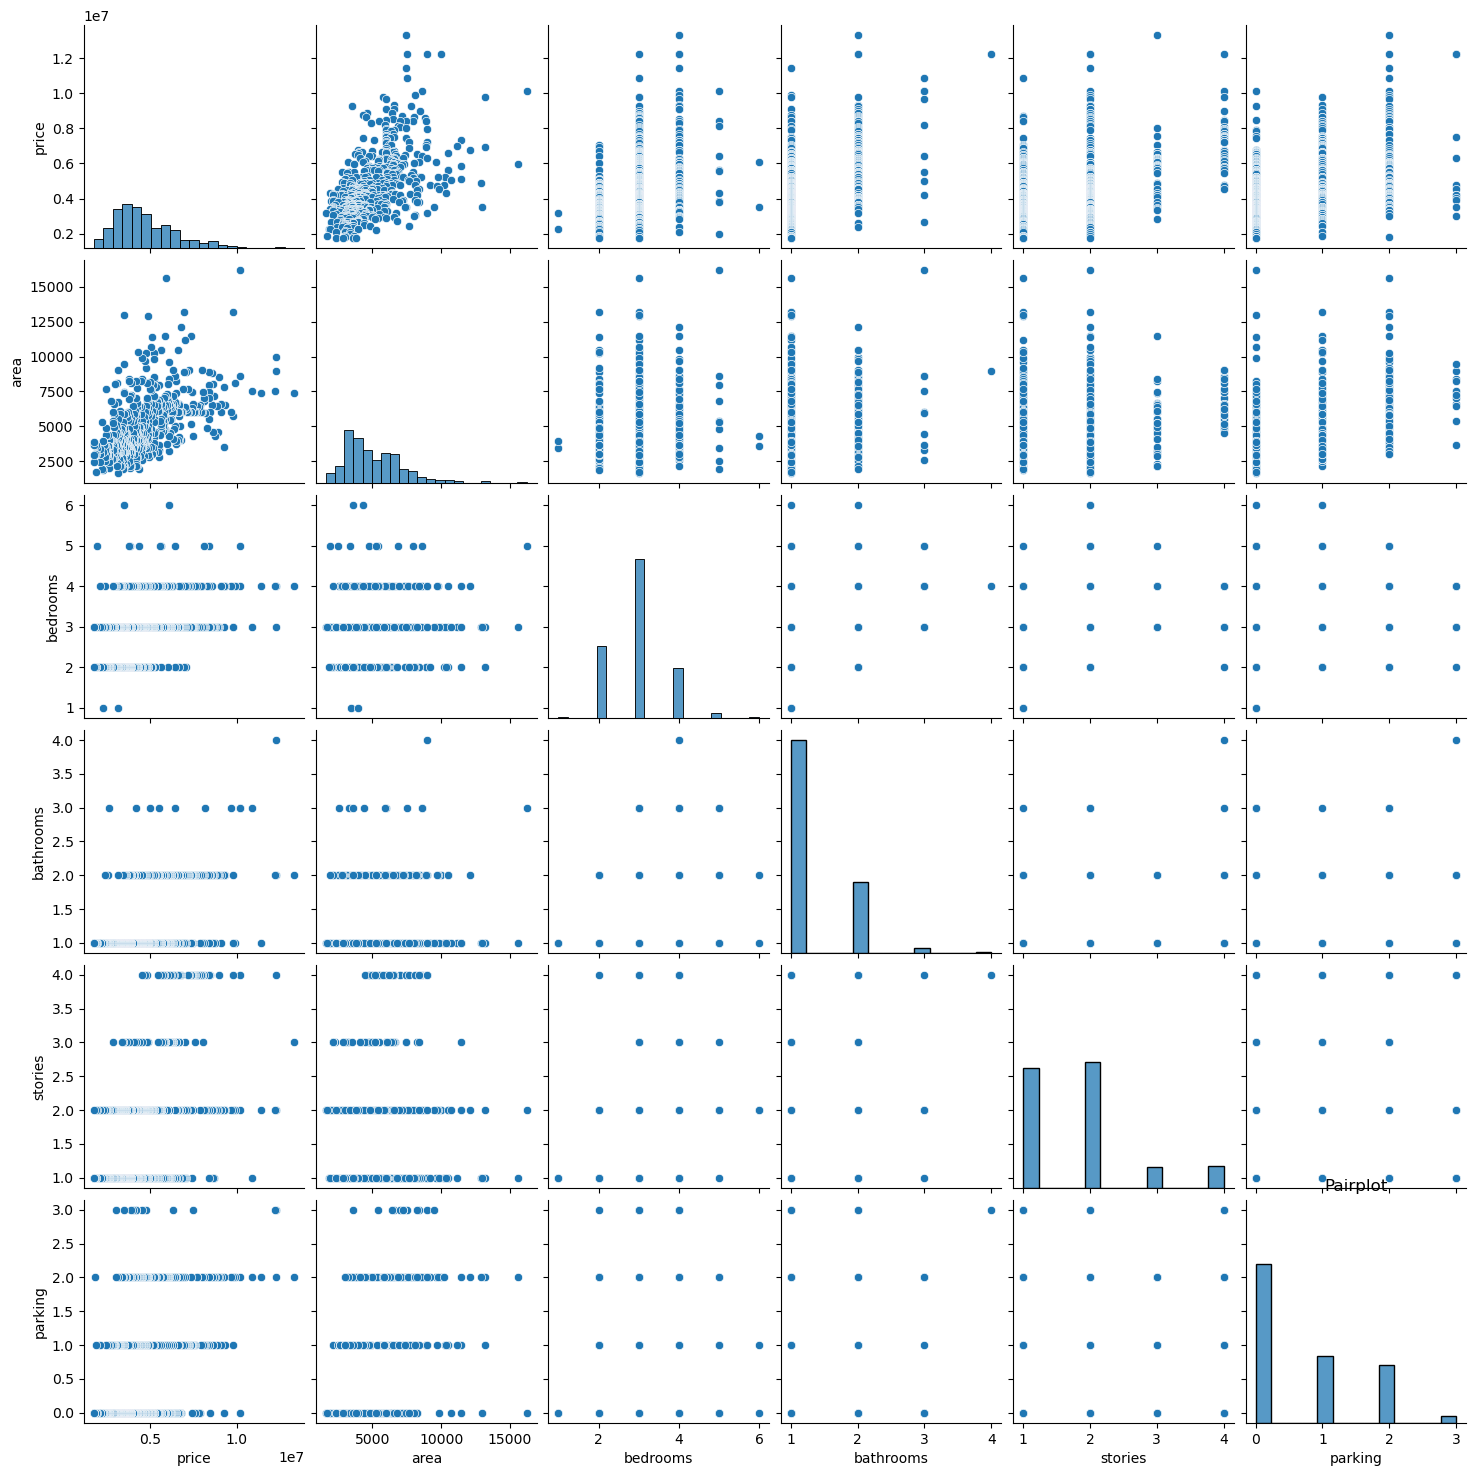

In [17]:
plt.figure(figsize=(12,12))
sns.pairplot(housing, kind="scatter")
plt.title("Pairplot")
plt.show()

#### Observation:
- **Clear upward trends:**
   - **Area, Bathrooms, and Stories** show strong positive relationships with Price.
   - **Bedrooms and Parking** also trend upward but with weaker associations.

- **Clusters & Outliers:**
   - Certain clusters suggest subgroups of houses (e.g., smaller vs. luxury homes).
   - Outliers in area and price indicate the presence of very large, high-value houses.

**Key Takeaway:**

- *House size (area) and amenities (bathrooms, stories) drive price more strongly than simple counts like bedrooms or parking slots.*

### 3. Data Preparation and model building

#### A. Convert all the categorical features to numarical features using One-Hot Encoding

In [18]:
# Identify categorical columns
categorical_col = housing.select_dtypes(include=["object"]).columns

# Perform One-Hot Encoding
housing_encoded = pd.get_dummies(housing, 
                                 columns=categorical_col, 
                                 drop_first=True)

# Convert boolean values to integers (0/1), if any
housing_encoded = housing_encoded.astype(int)

# Display the first few rows
housing_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [19]:
# Check the datatypes of encoded data
housing_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int32
 1   area                             545 non-null    int32
 2   bedrooms                         545 non-null    int32
 3   bathrooms                        545 non-null    int32
 4   stories                          545 non-null    int32
 5   parking                          545 non-null    int32
 6   mainroad_yes                     545 non-null    int32
 7   guestroom_yes                    545 non-null    int32
 8   basement_yes                     545 non-null    int32
 9   hotwaterheating_yes              545 non-null    int32
 10  airconditioning_yes              545 non-null    int32
 11  prefarea_yes                     545 non-null    int32
 12  furnishingstatus_semi-furnished  545 non-null    i

#### B. Split the data into X and y

In [20]:
X = housing_encoded.drop(columns=["price"]) # indipendent feature
y = housing_encoded["price"] #dependent feature

#### C. Split data into train and test. Keep 20% data reserved for testing

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

In [22]:
# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 13)
X_test shape: (109, 13)
y_train shape: (436,)
y_test shape: (109,)


#### D. Feature Scaling using StandardScalar

In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

#### E. Train a Supervised Learning Regression model - Linear Regression

In [24]:
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)

LinearRegression()

#### F. Print evaluation metrics for the model and clearly share insights

In [25]:
# Predict
y_pred = lin_model.predict(X_test_scaled)

# Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:", MSE)
print()

# Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:", MAE)
print()

# r2_score
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Mean Squared Error: 1586758224575.701

Mean Absolute Error: 892294.9491502056

Accuracy of the model is 62.21


#### Observation:
The model explains about **62% of the variation** in Boston house prices but still has significant errors. It’s a solid baseline, yet **feature engineering and better data** (e.g., location, property age, neighborhood facilities, crime rates) are needed to improve accuracy.

#### Visualization

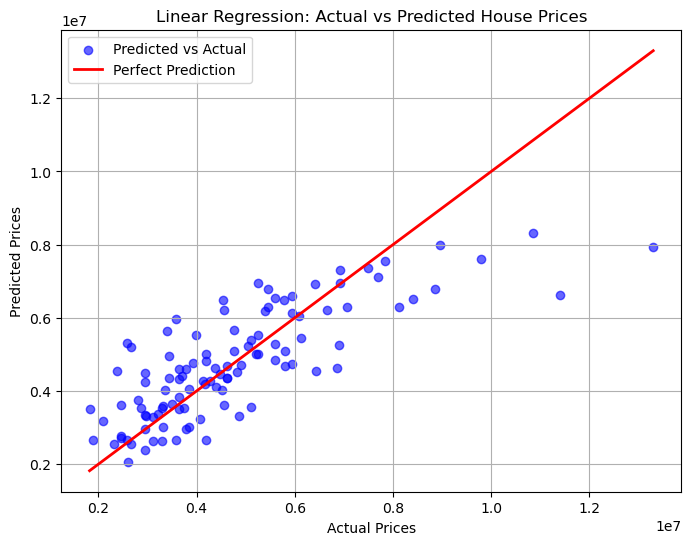

In [26]:
# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()

#### Observation:
- The **red line** shows perfect predictions (Predicted = Actual).
- The **blue dots** are your model’s predictions.
- Since many dots are close to the red line → model captures the overall trend.
- But there’s a noticeable spread → predictions are not exact, errors exist.
- With **R² ≈ 62%**, the model explains most of the trend but misses details, likely due to **non-linearity, missing features, or outliers**.

#### G. Calculation of Residuals

The residual is the difference between the actual house price (Y_actual) and the price predicted by my model (Y_predicted):

##### Residual= Y_actual - Y_predicted



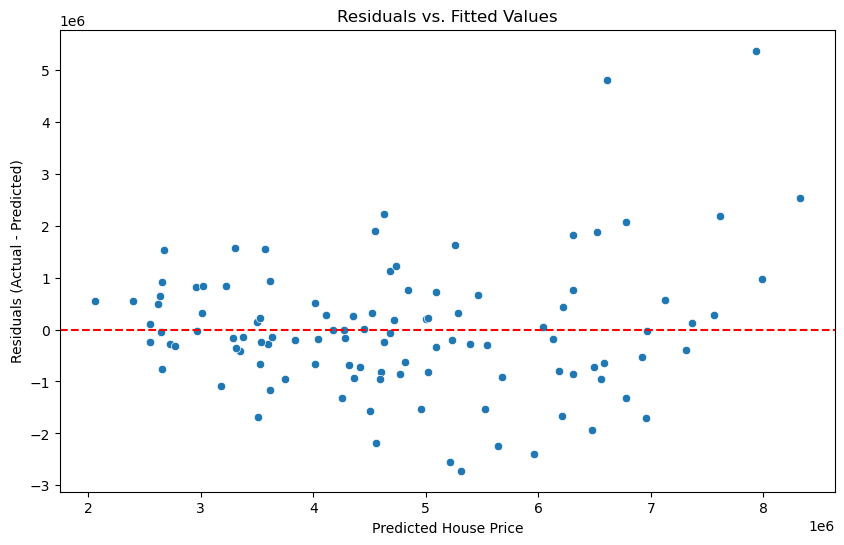

In [27]:
residuals = y_test - y_pred

# Residuals vs. Fitted Values Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Predicted House Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

#### Observation:

- Residual plot shows **increasing errors for expensive homes, outliers, and slight non-linearity**, indicating the linear model underestimates high prices. Use **non-linear models** like Random Forest or XGBoost for improvement.

#### H. Feature Importance: Impact of Predictors on House Price

In [28]:
coeff_df = pd.DataFrame(lin_model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                                   Coefficient
area                             519732.503184
bedrooms                          67336.059263
bathrooms                        527232.920622
stories                          417377.560665
parking                          224549.191856
mainroad_yes                     151504.871724
guestroom_yes                    123633.150040
basement_yes                     229999.092047
hotwaterheating_yes              194805.264992
airconditioning_yes              310671.716613
prefarea_yes                     256108.673668
furnishingstatus_semi-furnished  -37027.939716
furnishingstatus_unfurnished    -180911.225780


| Feature                             | Coefficient (USD) | Meaning                                                                                                |
| ----------------------------------- | ----------------- | ------------------------------------------------------------------------------------------------------ |
| **area**                            | 519,732.50        | For each unit increase in area (likely normalized), price increases by ~$519K. Strong positive effect. |
| **bedrooms**                        | 67,336.06         | Each additional bedroom increases price by ~$67K.                                                      |
| **bathrooms**                       | 527,232.92        | Each additional bathroom increases price by ~$527K — a very large effect.                              |
| **stories**                         | 417,377.56        | Each additional story increases price by ~$417K.                                                       |
| **parking**                         | 224,549.19        | Each additional parking spot increases price by ~$225K.                                                |
| **mainroad_yes**                    | 151,504.87        | Being on a main road increases price by ~$152K.                                                        |
| **guestroom_yes**                   | 123,633.15        | Having a guestroom increases price by ~$124K.                                                          |
| **basement_yes**                    | 229,999.09        | Having a basement increases price by ~$230K.                                                           |
| **hotwaterheating_yes**             | 194,805.26        | Hot water heating increases price by ~$195K.                                                           |
| **airconditioning_yes**             | 310,671.72        | Air conditioning increases price by ~$311K.                                                            |
| **prefarea_yes**                    | 256,108.67        | Preferred area increases price by ~$256K.                                                              |
| **furnishingstatus_semi-furnished** | -37,027.94        | Semi-furnished decreases price by ~$37K compared to fully furnished.                                   |
| **furnishingstatus_unfurnished**    | -180,911.23       | Unfurnished decreases price by ~$181K compared to fully furnished.                                     |


**Key Takeaways**

- **Positive coefficients:** Increase price when the feature is present or increased.
- **Negative coefficients:** Decrease price compared to reference category.
- **Magnitude matters:** Larger absolute coefficients indicate stronger influence on price.
- **Categorical features:** Encoded as dummy variables — coefficient shows difference from baseline (e.g., furnishingstatus_fully-furnished).

#### Observation:
Here, **bathrooms, area, stories, air conditioning** have very large coefficients → they have the strongest impact on price. This matches intuition — bigger houses, more amenities, and more bathrooms increase value significantly.

#### Visualization for feature importance

In [29]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin_model.coef_
})

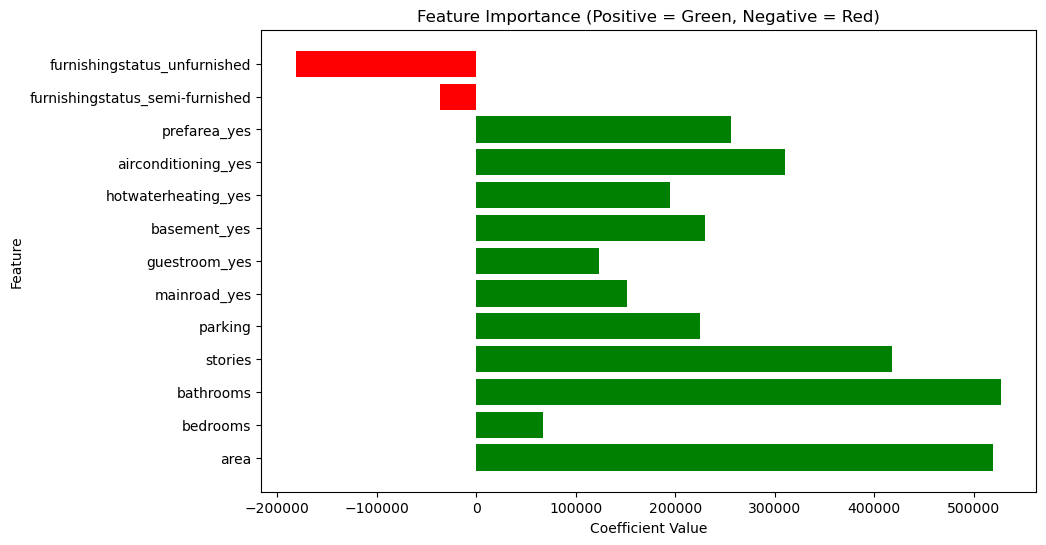

In [30]:
colors = coeff_df['Coefficient'].apply(lambda x: 'green' if x > 0 else 'red')
plt.figure(figsize=(10,6))
plt.barh(coeff_df["Feature"], coeff_df["Coefficient"], color=colors)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Positive = Green, Negative = Red)")
plt.show()


#### Observation:
The graph shows that bathrooms, area, and stories have the strongest positive impact on house prices, while unfurnished and semi-furnished status negatively affect prices. This reveals which property features most influence value, guiding pricing and investment decisions

#### I. 🏠 House Price Prediction — Insights & Conclusion

##### 1. Model Performance

| Metric | Value |
|--------|-------|
| **MSE** | \( 1.59 \times 10^{12} \) |
| **RMSE** | ₹1,259,666 |
| **R²** | 0.622 (62%) |

> The model explains **62% of the variance** in house prices.  
> While it captures general trends well, there is room for improvement to account for the remaining **38% variance**, likely due to missing features, non-linear relationships, or noise in the data.

---

##### 2. Residual Analysis Insight

The residual plot reveals **issues with heteroscedasticity, non-linearity, and outliers** in the model:

##### 2.1 Heteroscedasticity (Non-Constant Variance)
- Residual scatter is **not uniform**.
- Errors are **smaller** for houses predicted in the **lower price range** (~₹2M to ₹4M) and **larger & more variable** for houses in the **higher price range** (>₹5M).
- **Implication:** The model is **less reliable for expensive homes**.

##### 2.2 Outliers
- Several points deviate significantly from the \( Y = 0 \) line.
- Example: Residuals near predicted prices of ₹5M and ₹7M have errors close to ₹5M.
- **Action:** Investigate these data points for potential data issues or unique property characteristics.

##### 2.3 Non-Linearity
- Slight upward trend and wider spread of positive residuals for high-priced homes.
- **Implication:** The linear model may **underestimate prices** for expensive properties.

---

##### 📌 Recommendation
Since **StandardScaler** was already applied before training:

- **Model Selection:** Explore **non-linear models** such as:
  - Random Forest
  - XGBoost
  - Polynomial Regression  
  These models can better capture complex relationships, especially for higher-priced homes.
- **Feature Engineering:** Include additional features like location, property age, neighborhood facilities, and crime rates.
- **Outlier Handling:** Detect and treat extreme outliers to improve model stability.

---

##### 3. Feature Importance

| Feature | Impact |
|---------|--------|
| **Bathrooms** | ~₹520,000 increase per additional bathroom |
| **Area** | ~₹510,000 increase per unit area |
| **Stories** | ~₹430,000 increase per additional story |
| **Air Conditioning** | ~₹311,000 increase if present |
| **Furnishing Status** | Negative impact (unfurnished or semi-furnished lowers price) |

> Structural features like **bathrooms, area, stories**, and amenities like **air conditioning** strongly influence house prices. Furnishing status significantly affects buyer perception.

---

##### 4. Key Takeaway

> **House price is strongly influenced by structural features like bathrooms, area, and stories, along with amenities such as air conditioning. Furnishing status also plays an important role.**  
> This model offers valuable insights for real estate valuation, but performance can be improved with additional features and more sophisticated models.

---

##### 5. Suggestions for Improvement

- **Include additional features:** Location, property age, neighborhood facilities, crime rates, etc.  
- **Model enhancement:** Explore Polynomial Regression, Random Forest, or XGBoost to capture non-linear patterns.  
- **Outlier handling:** Remove or adjust extreme outliers for improved stability.
